In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [2]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [3]:
def threshold(cut_off,readcountsf_plus, position, upstream_length,downstream_length):
    if sum(readcountsf_plus[position-upstream_length:position+downstream_length])>=cut_off:
        return 'yes'
    else:
        return 'no'

    
def each_gene_averagegene(rpm, position, upstream_length, downstream_length):
    each_averagegene=[0 for x in range(0,(upstream_length+downstream_length))]
    countlist = rpm[position-upstream_length-1:position+downstream_length-1]
    totcounts = sum(countlist)
    if totcounts!=0:
        i=0
        while i < len(countlist): 
            each_averagegene[i]+=countlist[i]/totcounts 
            i+=1
    return each_averagegene


def each_gene_averagegene_minus(rpm, position, upstream_length, downstream_length):
    each_averagegene=[0 for x in range(0,(upstream_length+downstream_length))]
    reverse_countlist = rpm[position-downstream_length:position+upstream_length]
    countlist = reverse_countlist[::-1]
    totcounts = sum(countlist)
    if totcounts!=0:
        i=0
        while i < len(countlist): 
            each_averagegene[i]+=countlist[i]/totcounts 
            i+=1
    return each_averagegene


def wrap_genes_GEN_averagegene(cut_off,readcounts,rpm,positions,upstream_length,downstream_length):
    AGP_data=[]
    
    readcounts_plus = readcounts[0][readcounts[0].keys()[0]]
    rpm_plus = rpm[0][rpm[0].keys()[0]]
    position_plus = positions['+']
    for position in position_plus:
        cut_off_result = threshold(cut_off,readcounts_plus,position,upstream_length,downstream_length)
        if cut_off_result == 'yes':         
            EachGeneAveragegene=each_gene_averagegene(rpm_plus,position,upstream_length,downstream_length)
            AGP_data.append(EachGeneAveragegene)
    
    readcounts_minus = readcounts[1][readcounts[1].keys()[0]]
    rpm_minus = rpm[1][rpm[1].keys()[0]]
    position_minus = positions['-']        
    for position in position_minus:
        cut_off_result = threshold(cut_off,readcounts_minus,position,downstream_length,upstream_length) # opposite as minus
        if cut_off_result == 'yes':         
            EachGeneAveragegene=each_gene_averagegene_minus(rpm_minus,position,upstream_length,downstream_length)
            AGP_data.append(EachGeneAveragegene)
    
    AGP_df=DataFrame(AGP_data)
    AGP_df.loc['average']=AGP_df.mean(axis=0)
    return AGP_df

"\ndef get_position_dict(df):\n    df.reset_index(inplace=True)\n    position_dict = {}\n    position_dict['+']=[]\n    position_dict['-']=[]\n    for i in range(len(df)):\n        if df.loc[i,'strand'] == '+':\n            position_dict['+'].append(df.loc[i,'ATG'])\n        if df.loc[i,'strand'] == '-':\n            position_dict['-'].append(df.loc[i,'ATG'])\n    return position_dict\n\n    \ndef MA(average_df,MArange):\n    MA = []\n    x = MArange+1\n    while x < len(average_df.loc['average'])-10:\n        series = average_df.loc['average'][x-MArange-1:x+MArange]\n        MA.append(sum(series)/len(series))\n        x+=1\n    return MA\n\n\ndef AGP_plotter(graph_downstream,graph_upstream,average_df,tick_distance,color):\n    print len(average_df)\n    x=np.arange(graph_downstream-graph_upstream)\n    y=average_df.loc['average'][graph_upstream:graph_downstream]\n    plt.plot(x,y, color=color)\n    plt.xticks(np.arange(min(x), max(x)+1, tick_distance))\n\n    \ndef AGP_plotter_ax(ax1,

In [4]:
def RCRPM_loading(RC,RPM,filename,endtype,densitypath):
    with open(densitypath+filename+endtype+'_readcounts.pickle', 'rb') as f:
        RC[filename]=pickle.load(f)
    with open(densitypath+filename+endtype+'_rpm.pickle', 'rb') as f:
        RPM[filename]=pickle.load(f)
    #return [rcs,rpms]

In [22]:
import multiprocessing
import pickle
import threading
from datetime import datetime

#RC ={} somehow I need to do below to assign this dict to get the value evalutated from the RCRPM_loading
#RPM = {} somehow I need to do below to assign this dict to get the value evalutated from the RCRPM_loading
manager = multiprocessing.Manager()
RC = manager.dict()
RPM = manager.dict()

jobs = []


filenames = ['ks'+str(x) for x in range(5,17)]
endtype = '_3map'
densitypath = '/home/kazuki/^profilingdata/20160420_reanalyze/density/'
for filename in filenames:
    job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
    jobs.append(job)
    job.start()   
    
    
filenames = ['ks'+str(x) for x in range(31,43)]
endtype = '_3map'
densitypath = '/home/kazuki/^profilingdata/20161108_reanalyze/density/'
for filename in filenames:
    job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
    jobs.append(job)
    job.start()     

    
filenames = ['ks'+str(x) for x in range(57,61)]
endtype = '_3map'
densitypath = '/home/kazuki/^profilingdata/20170615_reanalyze/density/'
for filename in filenames:
    job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
    jobs.append(job)
    job.start()    
    
    
[job.join() for job in jobs] # just to get the time by the below line

print('done')

done


# Making dict of STOP

In [15]:
import pickle

with open('/home/kazuki/^data_analysis/^Ecoli_Genome/Ecoli_Gene_TU.pickle','rb') as f:
    Gene_TU_dict = pickle.load(f)
    
with open('/home/kazuki/^data_analysis/^Ecoli_Genome/Ecoli_3UTRdistance.pickle', 'rb') as af:
    Distance_dict = pickle.load(af)  

"\nwith open('/home/kazuNoOL_5utrki/^data_analysis/^Ecoli_Genome/Ecoli_NoOverlapFIVEutr.pickle', 'rb') as cf:\n    NoOL_5utr = pickle.load(cf)    \nwith open('/home/kazuki/^data_analysis/^Ecoli_Genome/Ecoli_NoOverlapTHREEutr.pickle', 'rb') as af:\n    NoOL_3utr = pickle.load(af)\n"

In [16]:
length = 110

longenough = []
for gene in Distance_dict.keys():
    if int(Distance_dict[gene])>length:
        longenough.append(gene)

In [17]:
position_dict = {}
position_dict['+']=[]
position_dict['-']=[]
for key in Gene_TU_dict.keys():
    if type(Gene_TU_dict[key][4]) != str:
        continue
    if key not in longenough:
        continue
    if Gene_TU_dict[key][0]=='+':            
        position_dict['+'].append(int(Gene_TU_dict[key][3]))              
    if Gene_TU_dict[key][0]=='-':
        position_dict['-'].append(int(Gene_TU_dict[key][2]))  

# Figures

# High salt ribosome profiling - 60min, 15min,  5min

1238
1171


([<matplotlib.axis.YTick at 0x7f2cc3dc5ed0>,
 <a list of 2 Text yticklabel objects>)

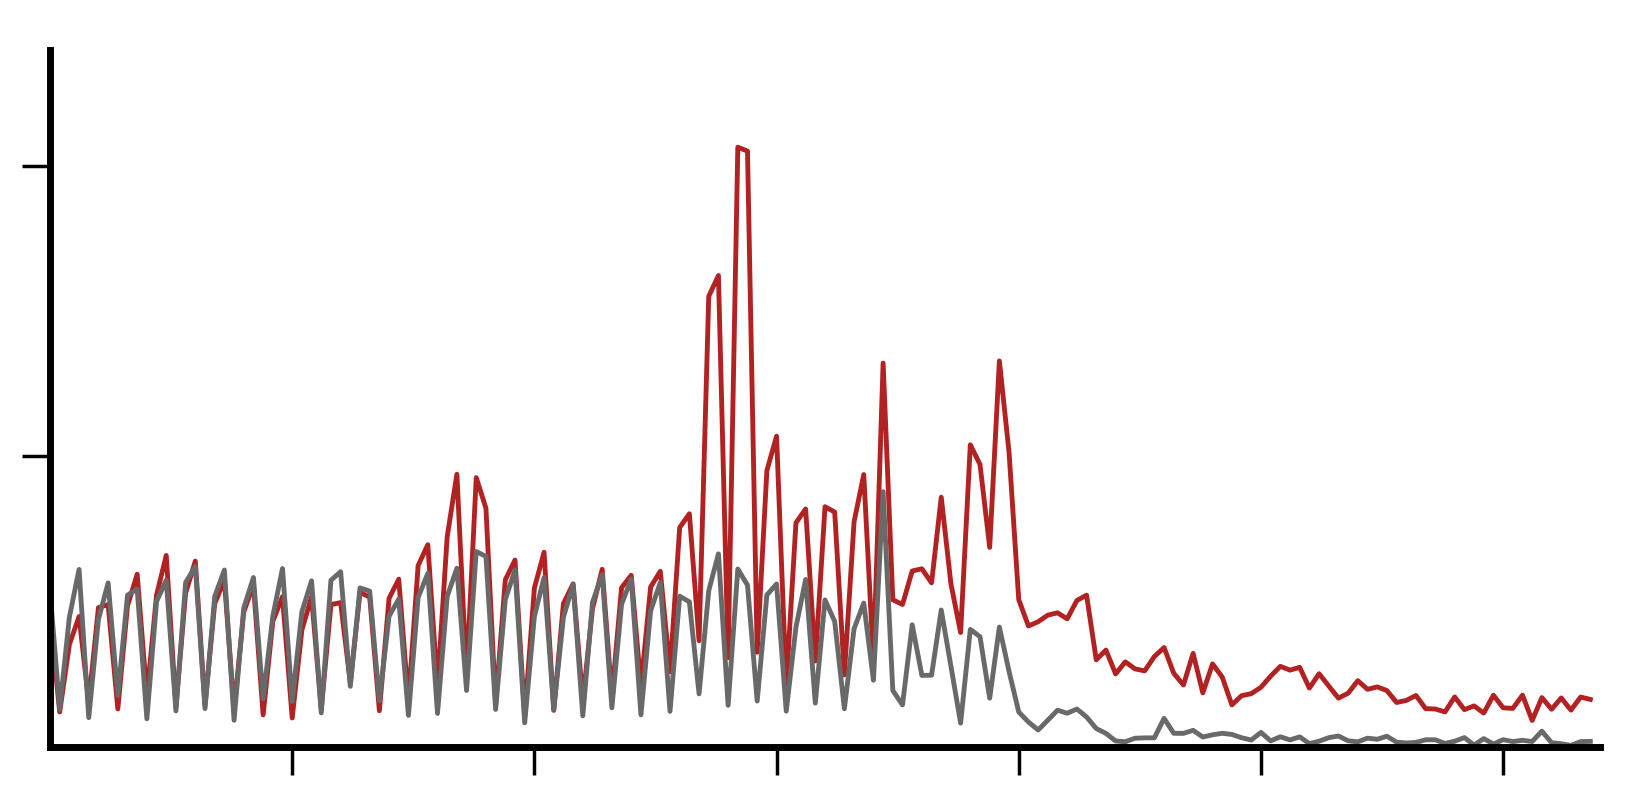

In [8]:
threshold_setting = 10
upstream_length_setting = 500 # upstream from the position analyzing while calculating Average Occupancy
downstream_length_setting = 100 # downstream from the position analyzing while calculating Average Occupancy
graph_upstream = 400+11 # 
graph_downstream = 560+11
tick_distance = 20

positions = position_dict

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.8) 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

library = 'ks16'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='firebrick', linewidth=0.7)


library = 'ks13'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='dimgrey', linewidth=0.7)
plt.xticks(np.arange(min(x), max(x)+1, tick_distance))

plt.xticks([25,50,75,100,125,150],['','','','','',''])
plt.ylim(0,0.012)
plt.yticks([0.005,0.01],['',''])
plt.tick_params(labelsize=6)
#plt.savefig('figs_AGP/fig_AGP_nacl_60.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

1159
1195


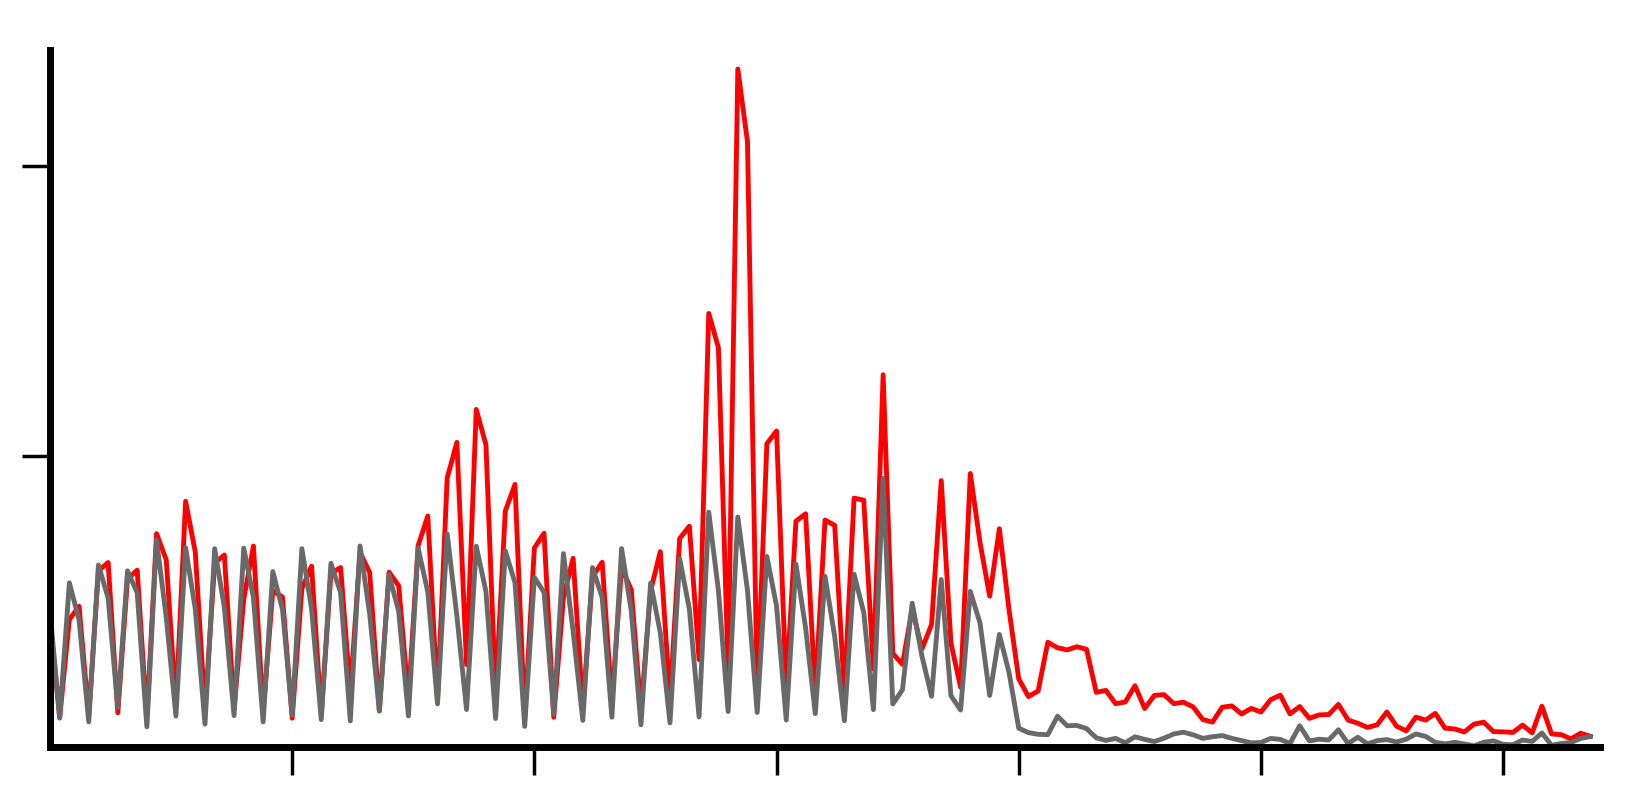

In [9]:
threshold_setting = 10
upstream_length_setting = 500 # upstream from the position analyzing while calculating Average Occupancy
downstream_length_setting = 100 # downstream from the position analyzing while calculating Average Occupancy
graph_upstream = 400+11 # 
graph_downstream = 560+11
tick_distance = 20

positions = position_dict

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.8) 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()


library = 'ks15'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)
x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='red', linewidth=0.7)


library = 'ks12'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)
x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='dimgrey', linewidth=0.7)
plt.xticks(np.arange(min(x), max(x)+1, tick_distance))


plt.xticks([25,50,75,100,125,150],['','','','','',''])
plt.ylim(0,0.012)
plt.yticks([0.005,0.01],['',''])
plt.tick_params(labelsize=6)
#plt.savefig('figs_AGP/fig_AGP_nacl_15.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

1096
1194


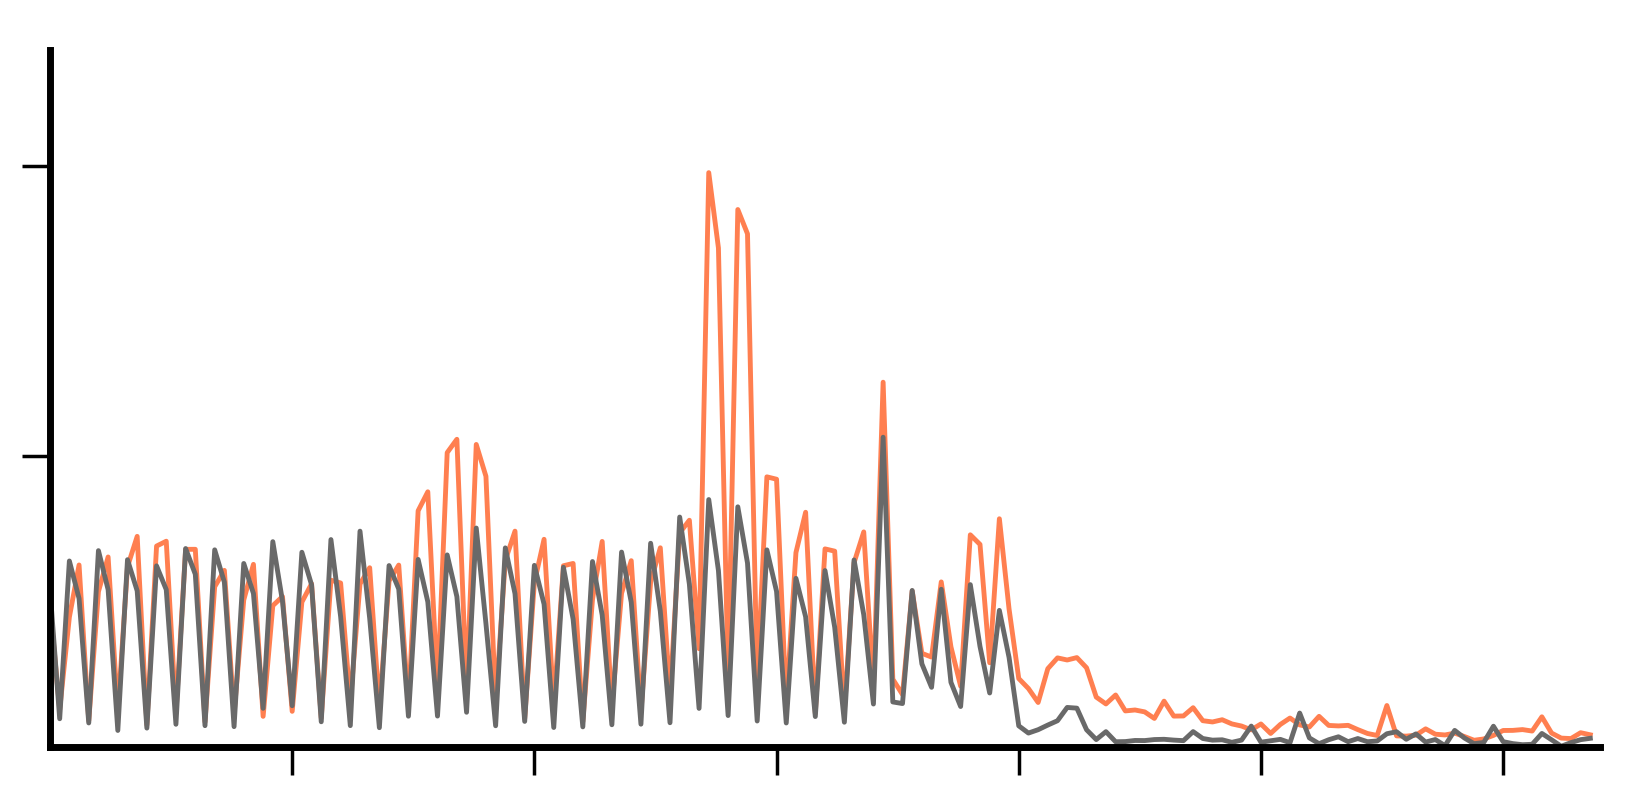

In [10]:
threshold_setting = 10
upstream_length_setting = 500 # upstream from the position analyzing while calculating Average Occupancy
downstream_length_setting = 100 # downstream from the position analyzing while calculating Average Occupancy
graph_upstream = 400+11 # 
graph_downstream = 560+11
tick_distance = 20

positions = position_dict

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.8) 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()


library = 'ks14'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)
x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='coral', linewidth=0.7)


library = 'ks11'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)
x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='dimgrey', linewidth=0.7)
plt.xticks(np.arange(min(x), max(x)+1, tick_distance))


plt.xticks([25,50,75,100,125,150],['','','','','',''])
plt.ylim(0,0.012)
plt.yticks([0.005,0.01],['',''])
plt.tick_params(labelsize=6)
#plt.savefig('figs_AGP/fig_AGP_nacl_5.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

# Standard ribosome profiling - 60min, 15min, 5min

986
1277


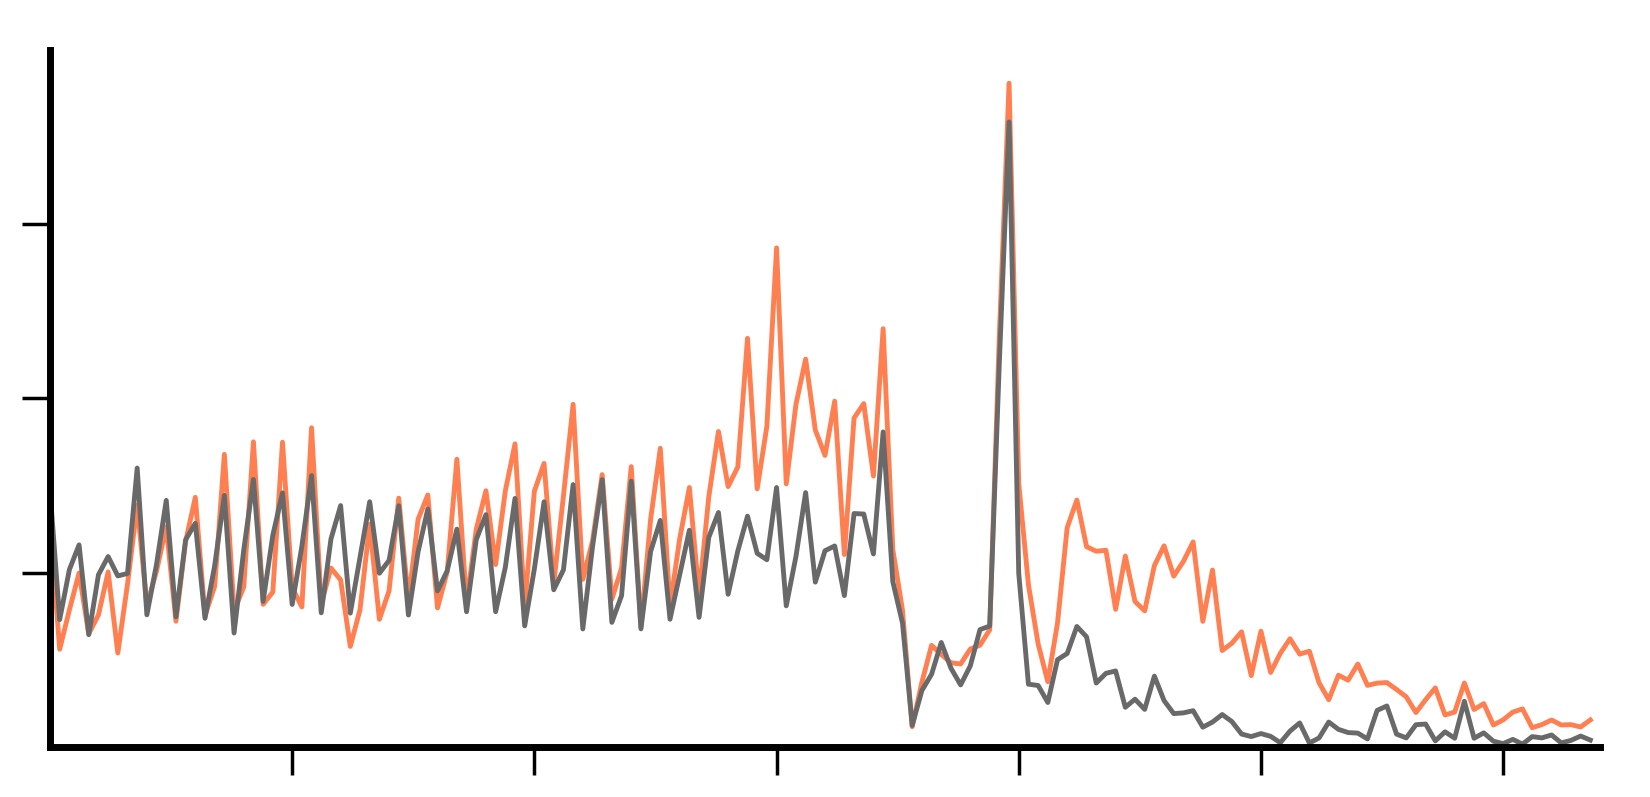

In [19]:
threshold_setting = 10
upstream_length_setting = 500 # upstream from the position analyzing while calculating Average Occupancy
downstream_length_setting = 100 # downstream from the position analyzing while calculating Average Occupancy
graph_upstream = 400+11 # 
graph_downstream = 560+11
tick_distance = 20

positions = position_dict

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.8) 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

library = 'ks8'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='coral', linewidth=0.7)


library = 'ks5'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='dimgrey', linewidth=0.7)
plt.xticks(np.arange(min(x), max(x)+1, tick_distance))



plt.xticks([25,50,75,100,125,150],['','','','','',''])
plt.ylim(0,0.008)
plt.yticks([0.002,0.004,0.006],['','',''])
plt.tick_params(labelsize=6)
#plt.savefig('figs_AGP/fig_AGP_normal_5.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

1192
1191


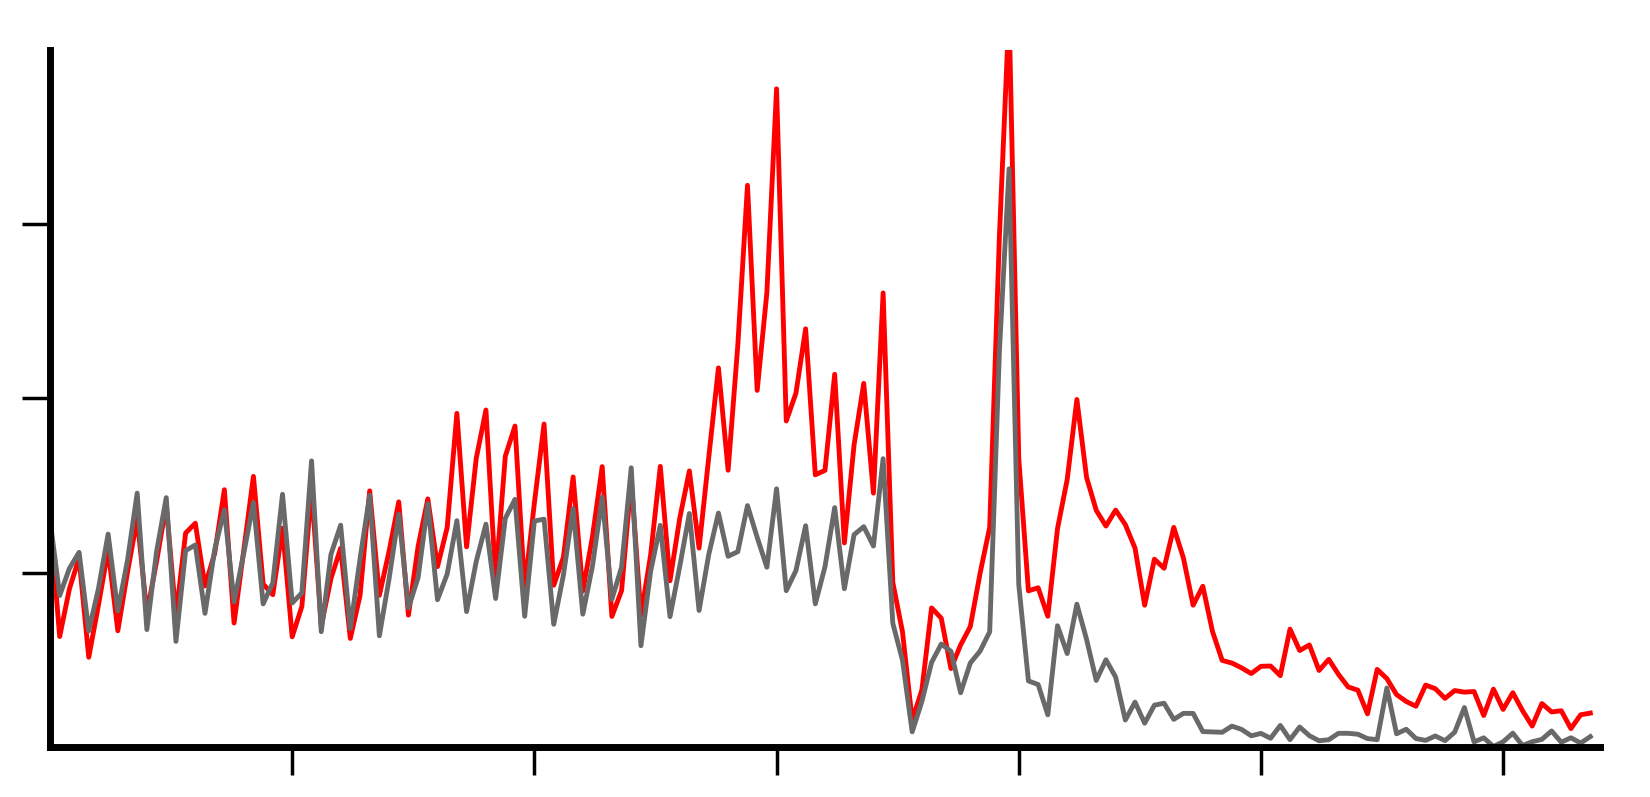

In [20]:
threshold_setting = 10
upstream_length_setting = 500 # upstream from the position analyzing while calculating Average Occupancy
downstream_length_setting = 100 # downstream from the position analyzing while calculating Average Occupancy
graph_upstream = 400+11 # 
graph_downstream = 560+11
tick_distance = 20

positions = position_dict

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.8) 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

library = 'ks9'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='red', linewidth=0.7)


library = 'ks6'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='dimgrey', linewidth=0.7)
plt.xticks(np.arange(min(x), max(x)+1, tick_distance))



plt.xticks([25,50,75,100,125,150],['','','','','',''])
plt.ylim(0,0.008)
plt.yticks([0.002,0.004,0.006],['','',''])
plt.tick_params(labelsize=6)
#plt.savefig('figs_AGP/fig_AGP_normal_15.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

1150
1205


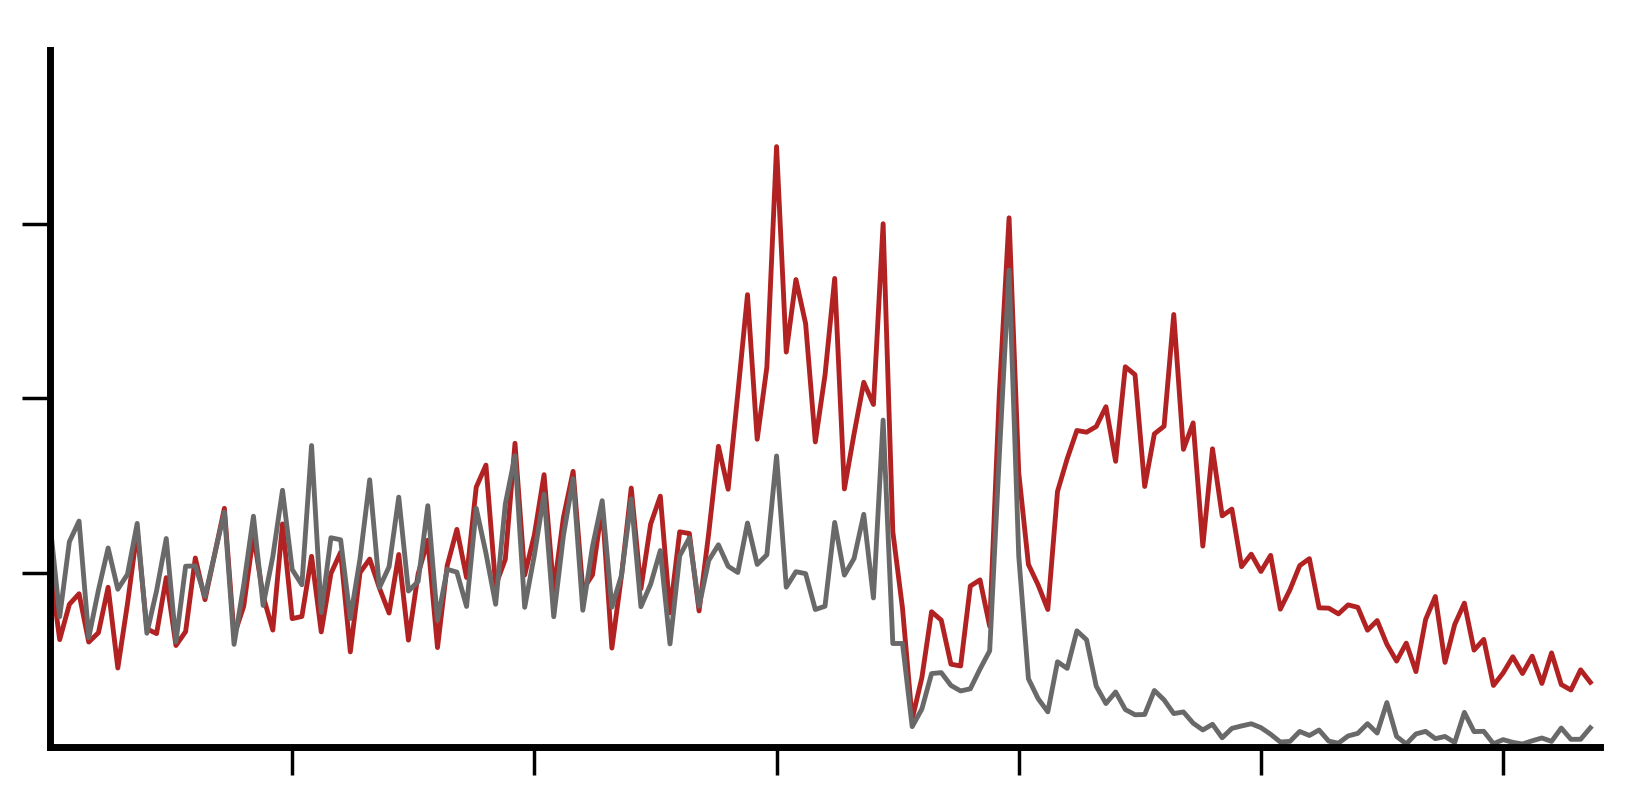

In [21]:
threshold_setting = 10
upstream_length_setting = 500 # upstream from the position analyzing while calculating Average Occupancy
downstream_length_setting = 100 # downstream from the position analyzing while calculating Average Occupancy
graph_upstream = 400+11 # 
graph_downstream = 560+11
tick_distance = 20

positions = position_dict

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.8) 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

library = 'ks10'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='firebrick', linewidth=0.7)


library = 'ks7'
average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
print len(average_df)

x=np.arange(graph_downstream-graph_upstream)
y=average_df.loc['average'][graph_upstream:graph_downstream]
plt.plot(x,y, color='dimgrey', linewidth=0.7)
plt.xticks(np.arange(min(x), max(x)+1, tick_distance))



plt.xticks([25,50,75,100,125,150],['','','','','',''])
plt.ylim(0,0.008)
plt.yticks([0.002,0.004,0.006],['','',''])
plt.tick_params(labelsize=6)
#plt.savefig('figs_AGP/fig_AGP_normal_60.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

# by TE

In [23]:
df_base_CDS = pd.read_csv('rrf_CDS.csv')
df_base_CDS = df_base_CDS.loc[:,~df_base_CDS.columns.str.contains('^Unnamed')]

In [24]:

##########################################################################################

def higiTElowTE_collision_plot(library,mRNA_library,high_color,all_color):
    high_TE = df_base_CDS['TE_'+library+'/'+mRNA_library]>df_base_CDS['TE_'+library+'/'+mRNA_library].quantile(0.80)
    low_TE = df_base_CDS['TE_'+library+'/'+mRNA_library]<df_base_CDS['TE_'+library+'/'+mRNA_library].quantile(0.40)
    plus = df_base_CDS['strand']=='+'
    minus = df_base_CDS['strand']=='-'
    mRNA = df_base_CDS['TU'].notna()

    plus_position = df_base_CDS[high_TE & mRNA & plus]['gene_end']
    minus_position = df_base_CDS[high_TE & mRNA & minus]['gene_start']

    plus_list = []
    for p in plus_position.values:
        if p in position_dict['+']:
            plus_list.append(p)
    minus_list = []
    for m in minus_position.values:
        if m in position_dict['-']:
            minus_list.append(m)

    position_dict_highTE = {}
    position_dict_highTE['+']=plus_list
    position_dict_highTE['-']=minus_list

    ###############

    plus_position = df_base_CDS[low_TE & mRNA & plus]['gene_end']
    minus_position = df_base_CDS[low_TE & mRNA & minus]['gene_start']
    plus_list = []
    for p in plus_position.values:
        if p in position_dict['+']:
            plus_list.append(p)
    minus_list = []
    for m in minus_position.values:
        if m in position_dict['-']:
            minus_list.append(m)
    position_dict_lowTE = {}
    position_dict_lowTE['+']=plus_list
    position_dict_lowTE['-']=minus_list

    ########################################################################################################################

    threshold_setting = 10 # originally 10
    upstream_length_setting = 400 # upstream from the position analyzing while calculating Average Occupancy
    downstream_length_setting = 150 # downstream from the position analyzing while calculating Average Occupancy
    graph_upstream = 200+11 # 
    graph_downstream = 490+11
    tick_distance = 20

    fig, ax = plt.subplots()
    fig.set_dpi(500)
    fig.set_size_inches(8, 1.8) 
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    sns.despine()


    ###############
    positions = position_dict_highTE

    average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
    print len(average_df)
    x=np.arange(graph_downstream-graph_upstream)
    y=average_df.loc['average'][graph_upstream:graph_downstream]
    plt.plot(x,y, color=high_color, linewidth=0.4)

    ###############
    positions = position_dict_lowTE

    average_df=wrap_genes_GEN_averagegene(threshold_setting,RC[library],RPM[library],positions,upstream_length_setting,downstream_length_setting)
    print len(average_df)
    x=np.arange(graph_downstream-graph_upstream)
    y=average_df.loc['average'][graph_upstream:graph_downstream]
    plt.plot(x,y, color=all_color, linewidth=0.4)


    plt.xticks([100,200])
    plt.ylim(0,0.0145)
    plt.yticks([0.01])
    plt.tick_params(labelsize=6)

318
240


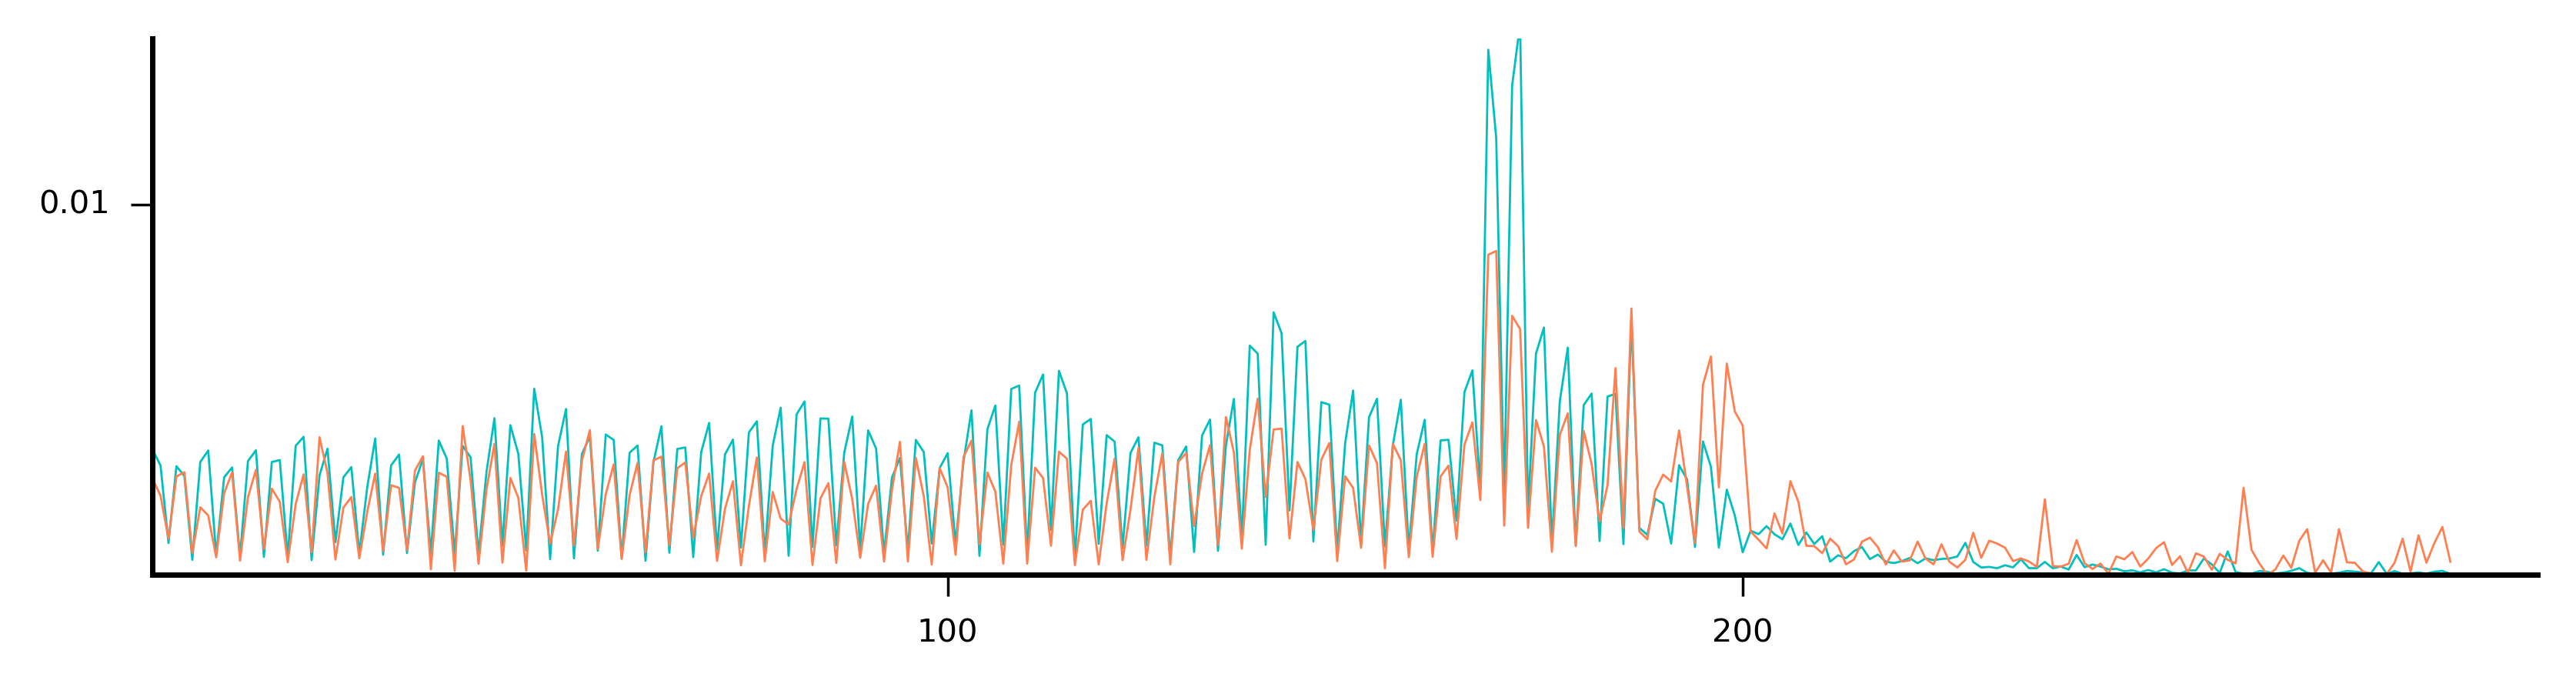

In [25]:
library = 'ks14'
mRNA_library= 'ks20'
high_color = 'c'
all_color = 'coral'
higiTElowTE_collision_plot(library,mRNA_library,high_color,all_color)
#plt.savefig('figs_AGP/fig_AGP_highlow_5.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

318
260


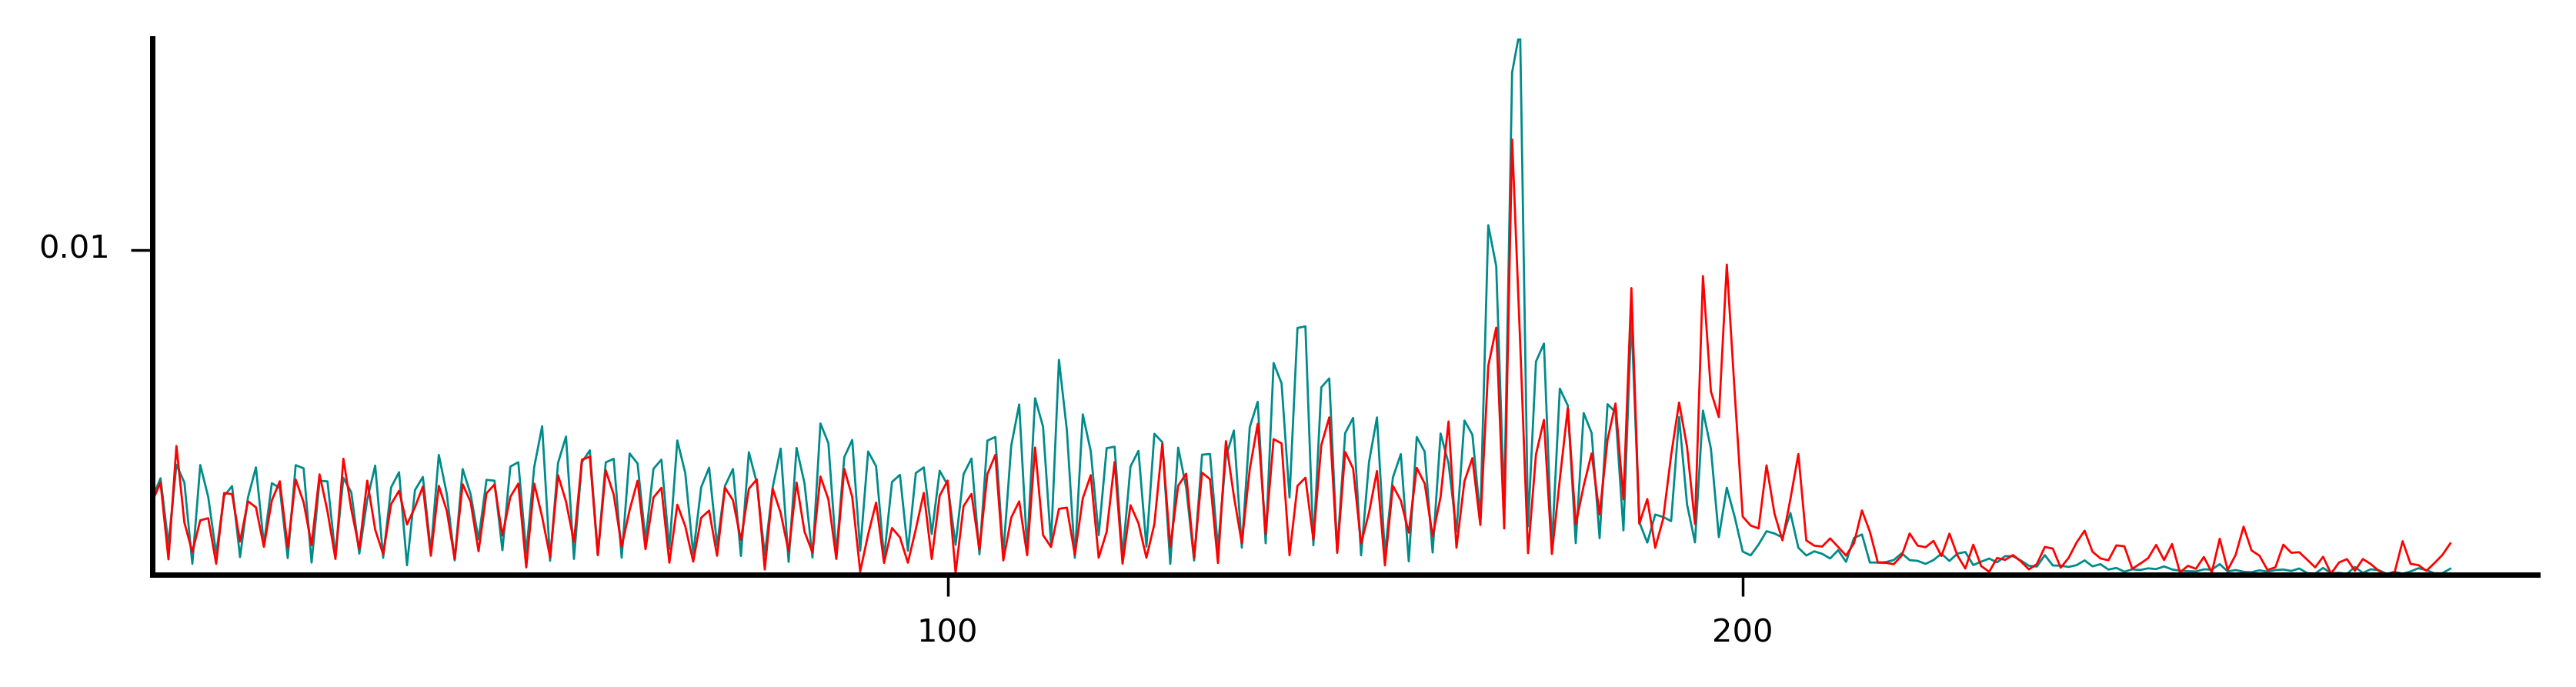

In [26]:
library = 'ks15'
mRNA_library= 'ks21'
high_color = 'darkcyan'
all_color = 'red'
higiTElowTE_collision_plot(library,mRNA_library,high_color,all_color)

plt.xticks([100,200])
plt.ylim(0,0.0165)
plt.yticks([0.01])
plt.tick_params(labelsize=6)

#plt.savefig('figs_AGP/fig_AGP_highlow_15.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

358
340


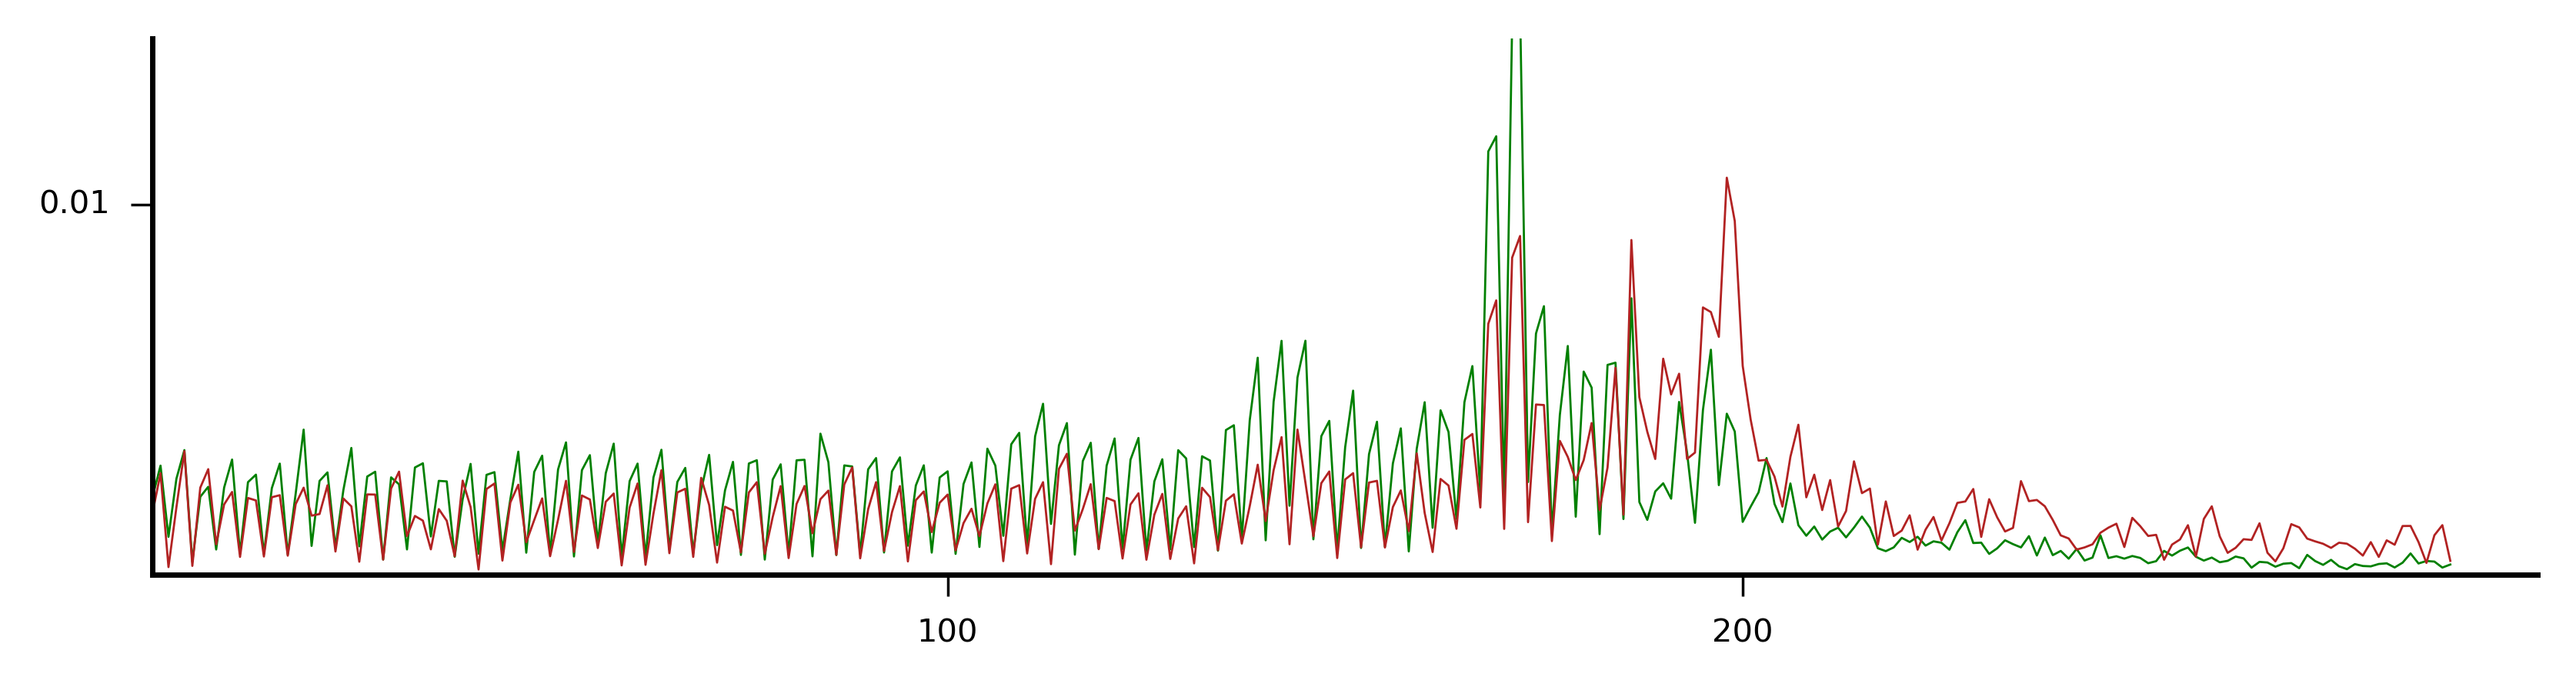

In [27]:
library = 'ks16'
mRNA_library= 'ks22'
high_color = 'green'
all_color = 'firebrick'
higiTElowTE_collision_plot(library,mRNA_library,high_color,all_color)
#plt.savefig('figs_AGP/fig_AGP_highlow_60.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

316
115


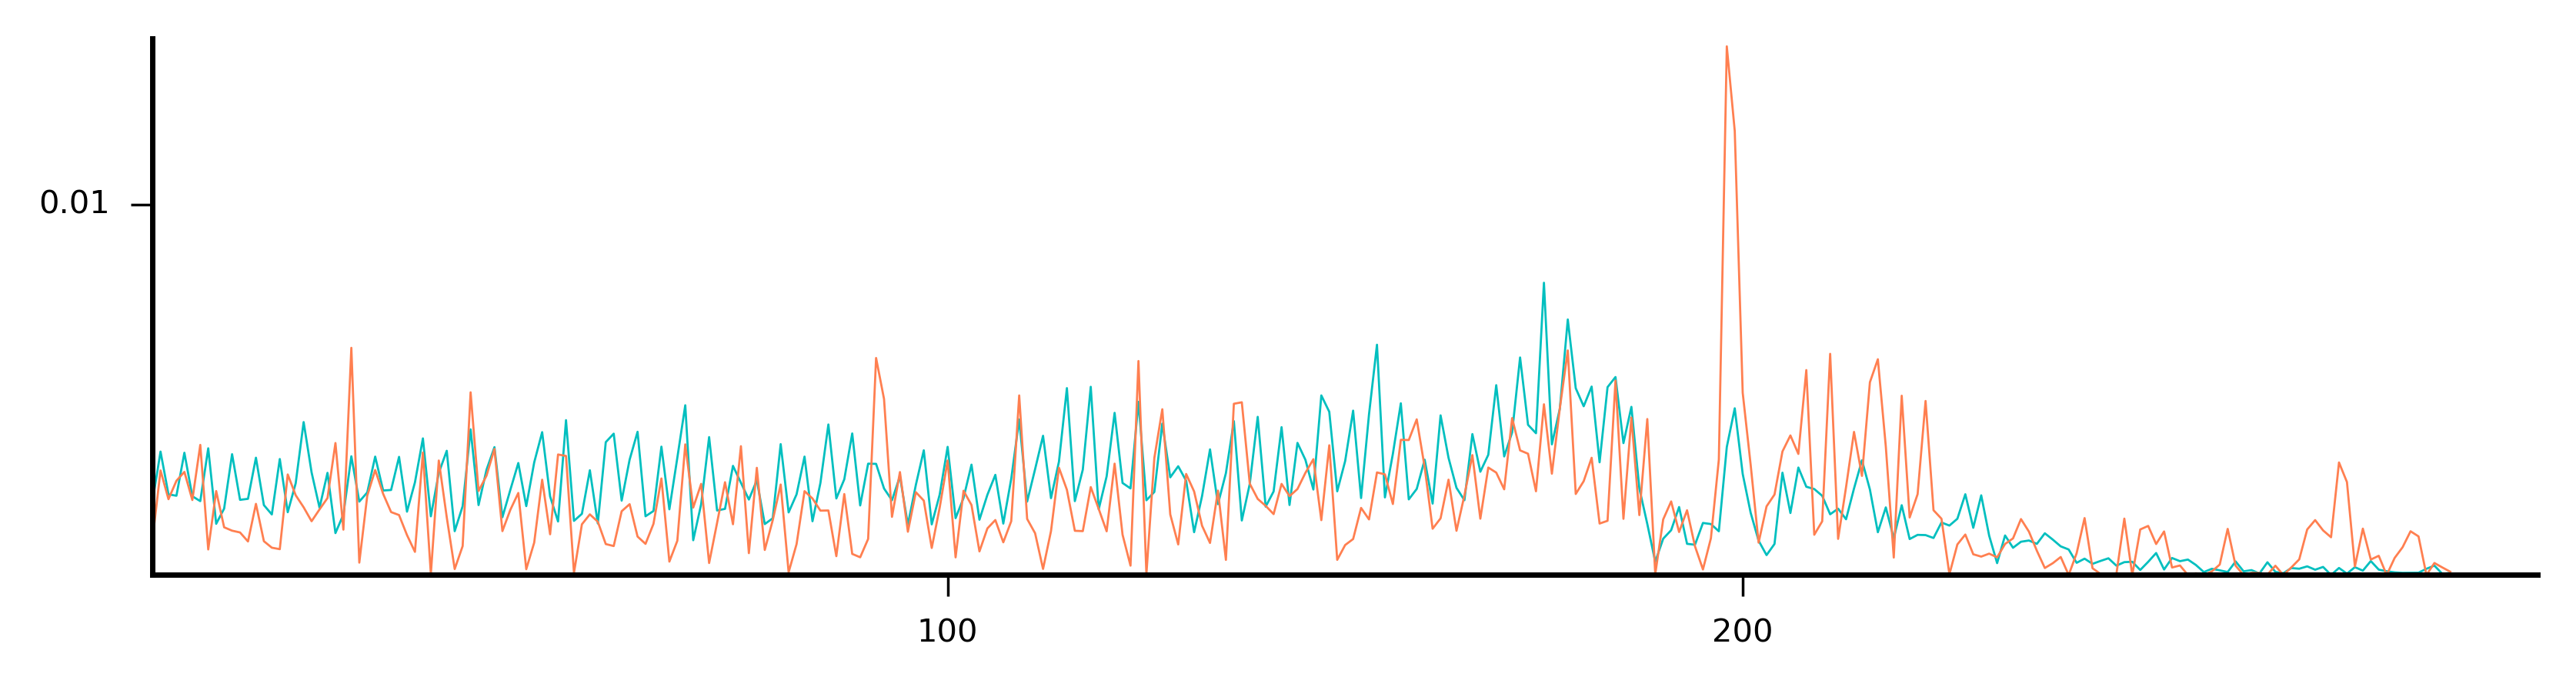

In [28]:
library = 'ks8'
mRNA_library= 'ks20'
high_color = 'c'
all_color = 'coral'
higiTElowTE_collision_plot(library,mRNA_library,high_color,all_color)
#plt.savefig('figs_AGP/fig_AGP_highlow_normal_5.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

325
183


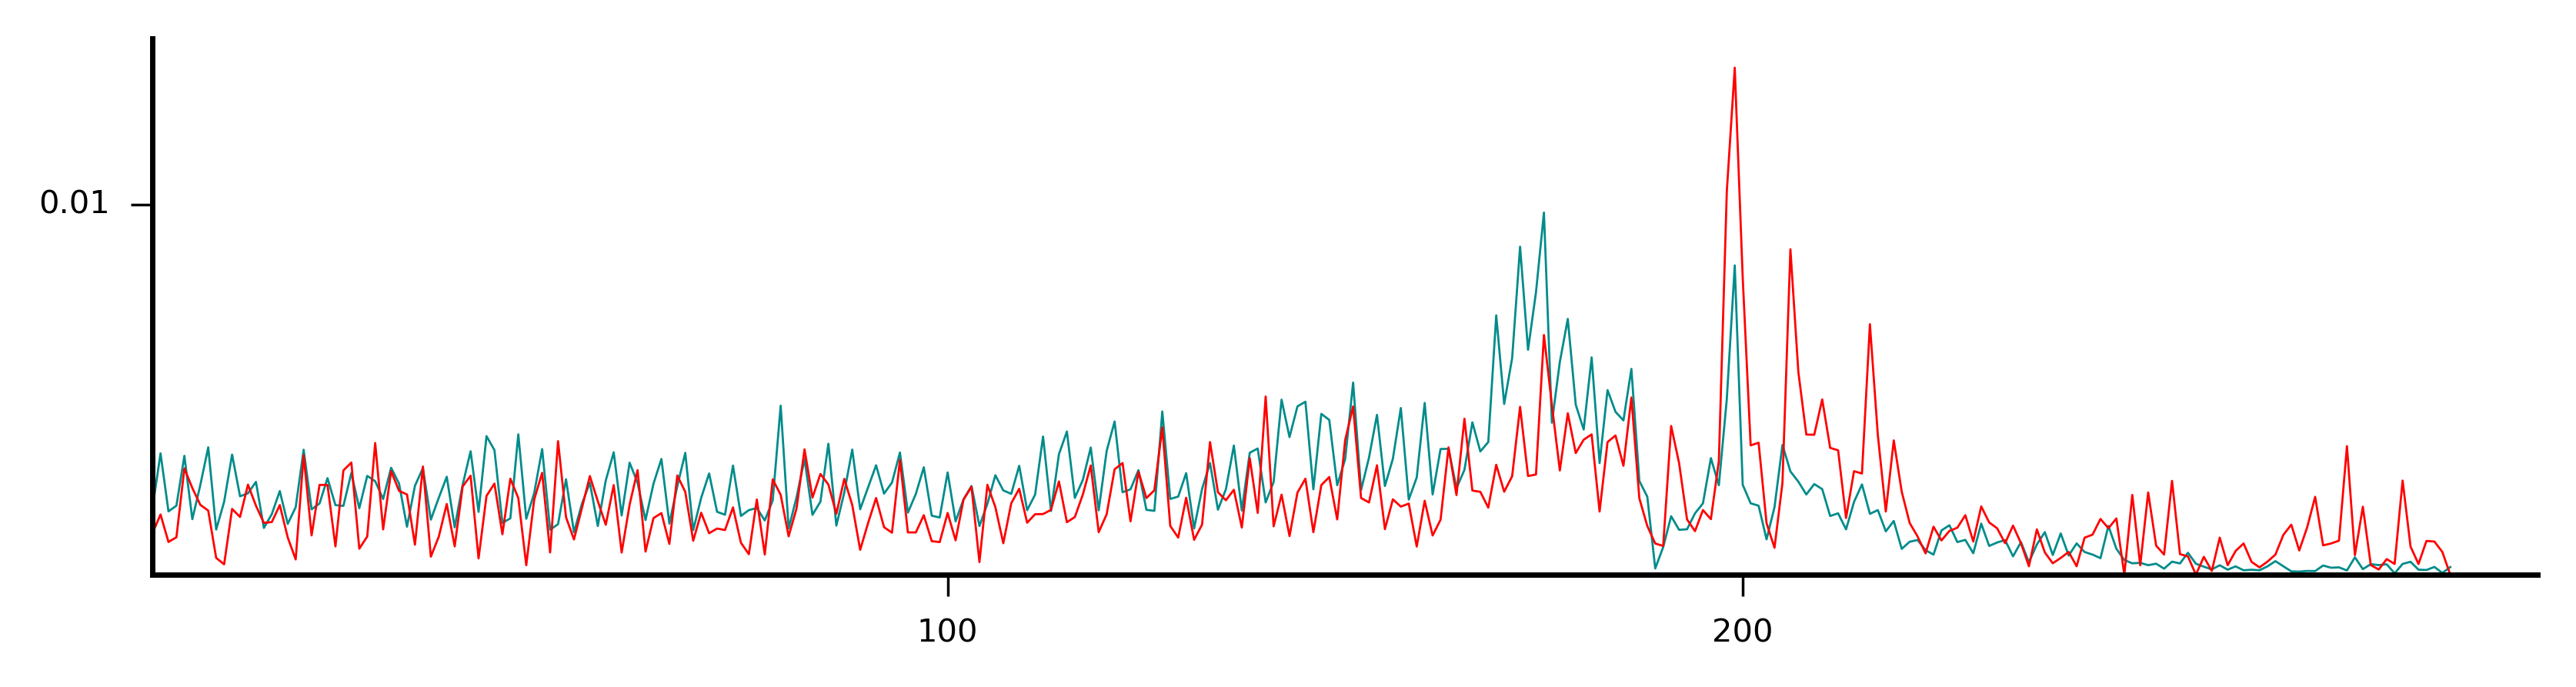

In [29]:
library = 'ks9'
mRNA_library= 'ks21'
high_color = 'darkcyan'
all_color = 'red'
higiTElowTE_collision_plot(library,mRNA_library,high_color,all_color)
#plt.savefig('figs_AGP/fig_AGP_highlow_normal_15.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)

345
195


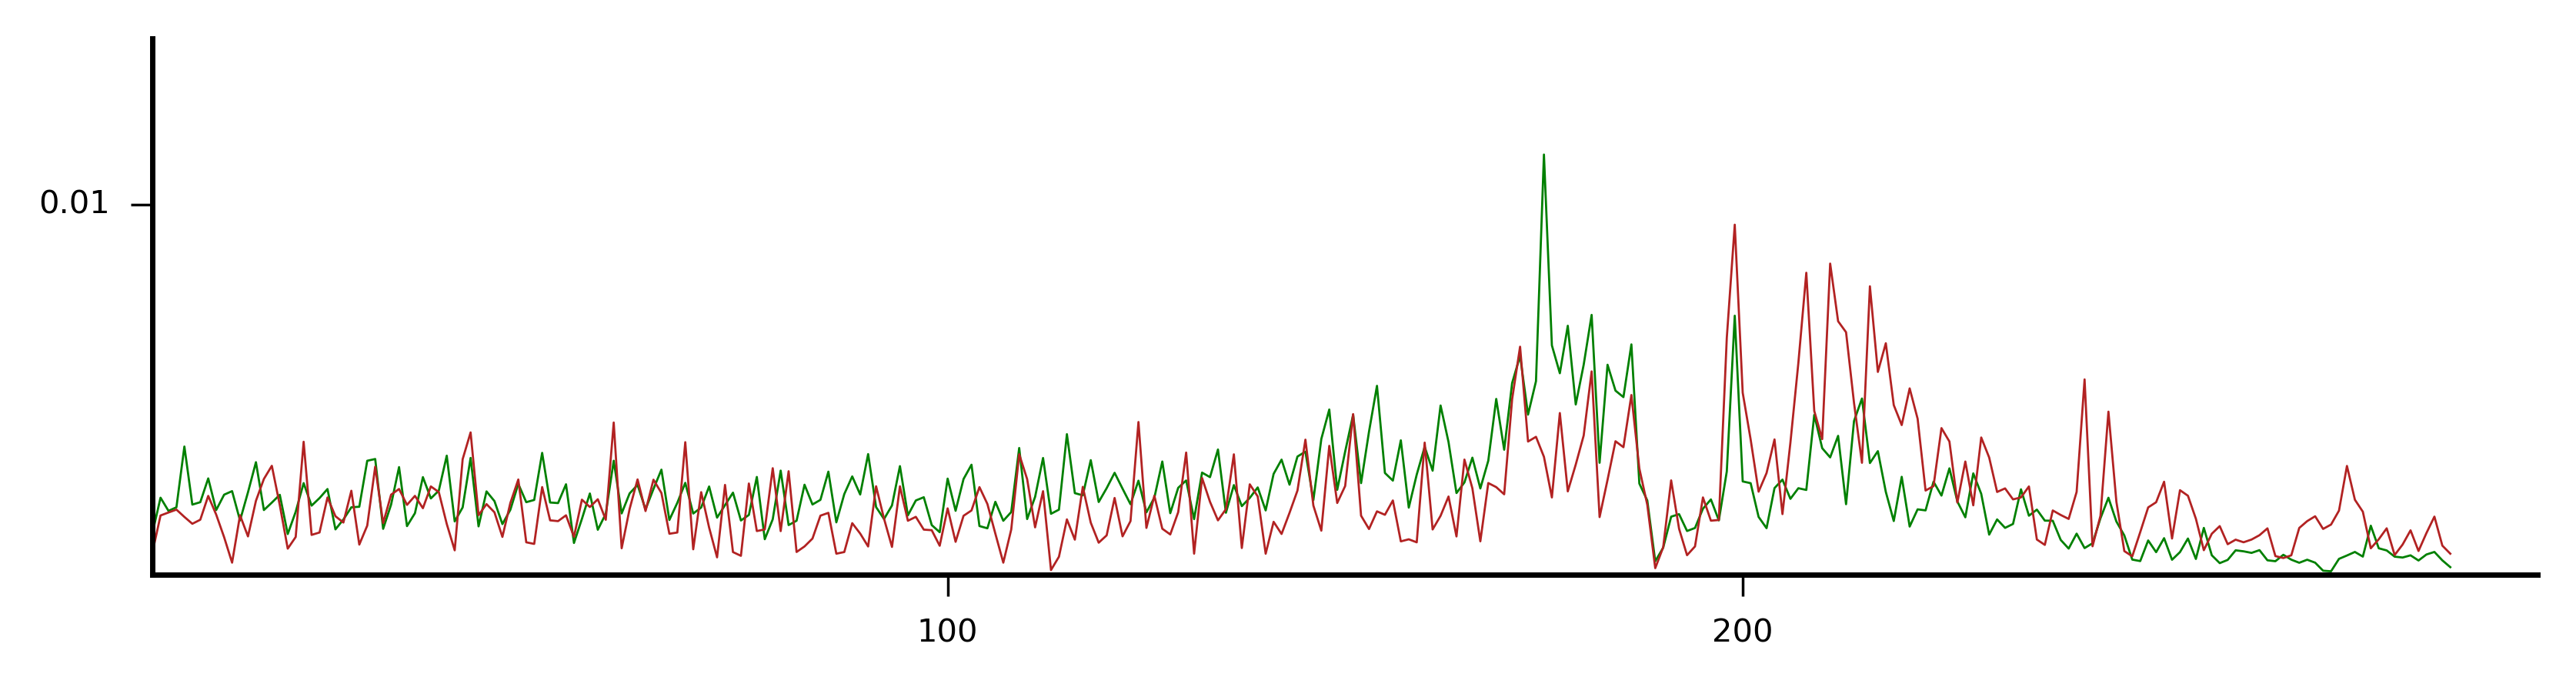

In [30]:
library = 'ks10'
mRNA_library= 'ks22'
high_color = 'green'
all_color = 'firebrick'
higiTElowTE_collision_plot(library,mRNA_library,high_color,all_color)
#plt.savefig('figs_AGP/fig_AGP_highlow_normal_60.pdf', dpi=500, bbox_inches="tight", pad_inches=0.05)